In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [365]:
#import data from .csv file
weather = pd.DataFrame(pd.read_csv("Weather Dataset.csv"))
weather.head()

,lat,lon,time,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,...,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
0,30.0,70.0,1/1/2015,0.14300,0.10950,0.12600,5.60,1.75,0.75,40.75,...,296.8,282.67500,296.725,4.350000,1.275001,-2.599999,-6.600,-3.925,-3.200000,-9999.0
1,30.0,70.0,1/2/2015,0.02925,0.02450,0.06525,8.40,20.50,19.00,34.50,...,296.8,284.15000,296.700,12.125002,5.850001,-1.749999,-5.075,-3.975,-2.200000,-9999.0
2,30.0,70.0,1/3/2015,0.18125,0.16325,0.10375,11.35,29.50,46.50,41.00,...,296.8,284.67500,296.600,26.575000,10.875000,0.775001,-13.925,-5.725,-0.874999,-9999.0
3,30.0,70.0,1/4/2015,0.12350,0.07725,-0.09000,12.40,36.50,38.75,40.50,...,296.8,285.15002,296.550,35.949997,18.375000,1.325000,-20.400,-6.050,2.925002,-9999.0
4,30.0,70.0,1/5/2015,-0.04575,0.04225,0.01700,11.25,20.75,22.25,38.75,...,296.8,285.75000,296.500,40.700000,17.400002,3.175001,-7.900,-6.550,1.575000,-9999.0


In [366]:
m = len(weather)
m

17902

In [367]:
weather.shape

(17902, 21)

In [368]:
#Training and Testing Splitting
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(weather, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.shape

(12531, 21)

In [369]:
df_test.shape

(5371, 21)

In [370]:
num_vars = ['lat', 'lon','omega_x', 'omega_y', 'omega', 'pr_wtr', 'rhum_x','rhum_y', 'rhum', 'slp', 'tmp_x', 'tmp_y', 'tmp','uwnd_x', 'uwnd_y', 'uwnd', 'vwnd_x', 'vwnd_y', 'vwnd','rain']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
6643,27.5,70.0,0.01800,0.05875,0.04075,44.225000,42.75,34.00,58.75,100162.5,297.7,308.575,301.67502,0.500000,-4.224999,2.925001,4.675000,-1.599999,3.875001,0.0
7858,27.5,72.5,0.06475,0.01100,-0.02200,7.625000,14.00,15.50,10.50,101892.5,296.7,284.875,298.34998,4.100001,6.775000,0.725001,-3.525000,-3.100000,-0.400000,0.0
12706,25.0,70.0,0.06075,-0.05575,-0.09500,34.324997,4.75,39.25,23.75,99580.0,299.6,310.900,301.40000,6.275000,5.500001,11.150000,-12.025000,-4.974999,0.250001,-9999.0
6830,27.5,70.0,-0.11150,0.04575,0.10000,13.475000,69.75,13.00,34.25,101855.0,297.7,285.125,297.42502,27.300000,15.250002,1.750001,26.349998,10.000000,-3.450000,0.0
12965,25.0,72.5,-0.00200,-0.02275,-0.08225,23.500000,36.25,30.50,32.75,100890.0,297.6,304.825,296.50000,12.200001,9.400002,5.125001,4.800000,1.275000,2.250001,0.0


In [371]:
df_Newtrain.shape

(12531, 20)

In [372]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(10)

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
6643,0.054770,-1.384366,-0.233052,0.506033,0.701906,1.293118,1.177953,0.047340,1.036164,-0.940542,0.548315,1.234531,1.349034,-1.061625,-1.546698,0.317250,0.801476,-0.006616,1.692818,0.558077
7858,0.054770,-0.503067,0.274524,-0.049701,-0.127573,-1.199953,-0.398257,-0.780750,-1.575711,1.536382,-0.103434,-1.696809,0.116555,-0.767798,0.237607,-0.420598,-0.317246,-0.369270,-0.045801,0.558077
12706,-1.157812,-1.384366,0.231095,-0.826564,-1.092544,0.618762,-0.905385,0.282338,-0.858460,-1.774535,1.786639,1.522099,1.247094,-0.590277,0.030790,3.075797,-1.476897,-0.822587,0.218551,-1.790653
6830,0.054770,-1.384366,-1.639068,0.354734,1.485119,-0.801470,2.658220,-0.892654,-0.290073,1.482692,0.548315,-1.665888,-0.226296,1.125756,1.612333,-0.076828,3.758585,2.797906,-1.286220,0.558077
12965,-1.157812,-0.503067,-0.450198,-0.442497,-0.924005,-0.118601,0.821593,-0.109326,-0.371271,0.101055,0.483140,0.770712,-0.569169,-0.106686,0.663407,1.055099,0.818529,0.688470,1.031940,0.558077
7839,0.054770,-0.503067,1.067104,0.497304,0.870446,-1.371948,0.026635,-1.340270,-1.291517,1.031691,-0.103434,-1.464899,0.505762,0.189181,0.132171,-0.697291,-0.781107,-0.623127,0.381228,0.558077
12358,-1.157812,-1.384366,-1.413779,-0.835293,-0.986794,2.275701,1.452077,0.618050,1.753415,-1.627781,1.786639,0.761435,1.321227,-1.055504,-1.129008,-1.326139,0.190954,-0.967648,-0.808354,-1.790653
16253,-1.157812,1.259531,0.961228,-0.852779,-1.608113,0.083706,-0.960210,2.072803,-0.953191,-0.848194,-0.624834,1.293282,-0.413497,-0.371946,0.334123,1.019884,-1.446199,-2.279242,-0.912060,0.558077
10668,0.054770,1.259531,1.004675,0.741711,-0.434910,-0.554547,-1.069859,-1.295509,-0.763729,-0.077914,-0.038259,-0.234233,0.357496,0.793160,-0.216579,0.166327,-0.197870,-0.822587,-1.306554,0.558077
9641,0.054770,0.378232,0.190381,0.052135,0.791133,-1.344701,-0.014484,-1.463365,-0.709597,0.813350,-0.429309,-1.727730,-0.031703,1.131877,1.072986,0.141173,0.859458,0.277463,0.127044,0.558077


In [373]:
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtest.head(10)

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
1369,1.254401,-1.357226,-0.037768,-0.148775,-0.139648,-0.795704,-0.746060,0.865247,-1.289478,-0.035622,-0.039846,0.357799,1.533941,-0.204257,-0.778126,-0.058818,0.210963,0.063051,0.651052,-1.757131
4780,1.254401,1.289069,-0.884624,-1.874529,-1.589967,-0.528870,0.108937,0.317875,-1.033540,-0.377795,-2.413393,0.730537,-1.522227,-1.005292,-0.069298,0.285885,0.725826,1.039950,0.520820,0.568724
9383,0.037167,0.406971,-0.723966,-1.566769,-1.406630,-0.763205,-0.298204,1.021639,-0.791072,-0.285123,-0.435437,-0.971212,-1.559049,2.333043,0.967312,-0.119141,-0.825673,1.276590,0.811339,0.568724
12314,-1.180066,-1.357226,-0.329130,0.153232,-0.719121,0.736881,-0.623917,-0.050763,0.178800,-0.841154,1.806245,1.320191,0.650230,0.322197,0.328138,1.526818,1.140480,0.427113,0.400605,-1.757131
11919,-1.180066,-1.357226,-0.928192,-0.470916,-0.339353,0.687277,-0.406775,-1.000285,0.960085,-0.456209,1.806245,0.864963,0.061089,0.045550,0.065912,1.432024,0.943519,1.185575,1.292198,-1.757131
12128,-1.180066,-1.357226,-0.830164,-0.200548,0.727924,-0.219274,-0.379632,-1.033798,0.340445,0.677238,1.806245,-0.140197,1.469504,0.753682,1.372943,0.372062,1.427283,1.434350,0.691124,-1.757131
4112,1.254401,0.406971,-0.035045,-0.663625,-0.859896,-0.145724,-0.841060,-0.598135,-0.979658,-1.554013,0.487608,1.527945,0.217579,-1.211745,-0.601944,-0.799930,-0.666723,-1.223300,0.350515,0.568724
5818,0.037167,-1.357226,1.857446,1.266343,-0.038158,0.062954,-0.433918,-0.039592,0.623324,-0.302944,0.553540,0.192821,-0.537265,1.286330,0.533001,-0.972282,-1.668804,-1.053405,0.080032,0.568724
9251,0.037167,0.406971,2.026273,1.237580,0.367800,-1.296873,-0.990345,-1.469461,-1.316419,0.805553,-0.435437,-0.787900,0.208374,0.392390,-0.159438,-0.015730,-1.458022,-1.344654,-0.781507,0.568724
9311,0.037167,0.406971,2.151531,1.473434,1.019298,-1.312267,-0.067491,-0.799210,-1.976470,1.251090,-0.435437,-1.765565,-0.748980,0.268519,0.672309,-0.446609,-1.862310,-2.448975,-1.152169,0.568724


In [374]:
y_Newtrain = df_Newtrain.pop('rain')
X_Newtrain = df_Newtrain

In [375]:
X_Newtrain.head()

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd
6643,0.054770,-1.384366,-0.233052,0.506033,0.701906,1.293118,1.177953,0.047340,1.036164,-0.940542,0.548315,1.234531,1.349034,-1.061625,-1.546698,0.317250,0.801476,-0.006616,1.692818
7858,0.054770,-0.503067,0.274524,-0.049701,-0.127573,-1.199953,-0.398257,-0.780750,-1.575711,1.536382,-0.103434,-1.696809,0.116555,-0.767798,0.237607,-0.420598,-0.317246,-0.369270,-0.045801
12706,-1.157812,-1.384366,0.231095,-0.826564,-1.092544,0.618762,-0.905385,0.282338,-0.858460,-1.774535,1.786639,1.522099,1.247094,-0.590277,0.030790,3.075797,-1.476897,-0.822587,0.218551
6830,0.054770,-1.384366,-1.639068,0.354734,1.485119,-0.801470,2.658220,-0.892654,-0.290073,1.482692,0.548315,-1.665888,-0.226296,1.125756,1.612333,-0.076828,3.758585,2.797906,-1.286220
12965,-1.157812,-0.503067,-0.450198,-0.442497,-0.924005,-0.118601,0.821593,-0.109326,-0.371271,0.101055,0.483140,0.770712,-0.569169,-0.106686,0.663407,1.055099,0.818529,0.688470,1.031940


In [376]:
y_Newtrain.head()

6643     0.558077
7858     0.558077
12706   -1.790653
6830     0.558077
12965    0.558077
Name: rain, dtype: float64

In [377]:
y = y_Newtrain.values
print('y = ', y[: 10])

y =  [ 0.55807718  0.55807718 -1.79065253  0.55807718  0.55807718  0.55807718
 -1.79065253  0.55807718  0.55807718  0.55807718]


In [378]:
# training set preparation

X1 = df_Newtrain.values[:, 0]      
X2 = df_Newtrain.values[:, 1]              
X3 = df_Newtrain.values[:, 2]                
X4 = df_Newtrain.values[:, 3]              
X5 = df_Newtrain.values[:, 4]     
X6 = df_Newtrain.values[:, 5] 
X7 = df_Newtrain.values[:, 6] 
X8 = df_Newtrain.values[:, 7] 
X9 = df_Newtrain.values[:, 8] 
X10 = df_Newtrain.values[:, 9] 
X11 = df_Newtrain.values[:, 10] 
X12 = df_Newtrain.values[:, 11] 
X13 = df_Newtrain.values[:, 12] 
X14 = df_Newtrain.values[:, 13] 
X15 = df_Newtrain.values[:, 14] 
X16 = df_Newtrain.values[:, 15] 
X17 = df_Newtrain.values[:, 16] 
X18 = df_Newtrain.values[:, 17] 
X19 = df_Newtrain.values[:, 18] 

In [379]:
m = len(X_Newtrain)        
X_0 = np.ones((m, 1))      # Single column matrix with all ones
X_0 [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [380]:
# 1D arrays to 2D array conversion
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_4 = X4.reshape(m, 1)
X_5 = X5.reshape(m, 1)
X_6 = X6.reshape(m, 1)
X_7 = X7.reshape(m, 1)
X_8 = X8.reshape(m, 1)
X_9 = X9.reshape(m, 1)
X_10 = X10.reshape(m, 1)
X_11 = X11.reshape(m, 1)
X_12 = X12.reshape(m, 1)
X_13 = X13.reshape(m, 1)
X_14 = X14.reshape(m, 1)
X_15 = X15.reshape(m, 1)
X_16 = X16.reshape(m, 1)
X_17 = X17.reshape(m, 1)
X_18 = X18.reshape(m, 1)
X_19 = X19.reshape(m, 1)

In [381]:
# Final X Matrix for training
X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11, X_12, X_13, X_14, X_15, X_16, X_17, X_18, X_19))

In [382]:
theta = np.zeros(20)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [383]:
y_Newtest = df_Newtest.pop('rain')
X_Newtest = df_Newtest

In [384]:
X_Newtest.head()

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd
1369,1.254401,-1.357226,-0.037768,-0.148775,-0.139648,-0.795704,-0.746060,0.865247,-1.289478,-0.035622,-0.039846,0.357799,1.533941,-0.204257,-0.778126,-0.058818,0.210963,0.063051,0.651052
4780,1.254401,1.289069,-0.884624,-1.874529,-1.589967,-0.528870,0.108937,0.317875,-1.033540,-0.377795,-2.413393,0.730537,-1.522227,-1.005292,-0.069298,0.285885,0.725826,1.039950,0.520820
9383,0.037167,0.406971,-0.723966,-1.566769,-1.406630,-0.763205,-0.298204,1.021639,-0.791072,-0.285123,-0.435437,-0.971212,-1.559049,2.333043,0.967312,-0.119141,-0.825673,1.276590,0.811339
12314,-1.180066,-1.357226,-0.329130,0.153232,-0.719121,0.736881,-0.623917,-0.050763,0.178800,-0.841154,1.806245,1.320191,0.650230,0.322197,0.328138,1.526818,1.140480,0.427113,0.400605
11919,-1.180066,-1.357226,-0.928192,-0.470916,-0.339353,0.687277,-0.406775,-1.000285,0.960085,-0.456209,1.806245,0.864963,0.061089,0.045550,0.065912,1.432024,0.943519,1.185575,1.292198


In [385]:
y_Newtest.head()

1369    -1.757131
4780     0.568724
9383     0.568724
12314   -1.757131
11919   -1.757131
Name: rain, dtype: float64

In [386]:
y_test = y_Newtest.values
print('y_test = ', y_test[: 10])

y_test =  [-1.75713069  0.56872433  0.56872433 -1.75713069 -1.75713069 -1.75713069
  0.56872433  0.56872433  0.56872433  0.56872433]


In [387]:
# testing/validarion set preparation
X1_test = df_Newtest.values[:, 0]                 
X2_test = df_Newtest.values[:, 1]                 
X3_test = df_Newtest.values[:, 2]                
X4_test = df_Newtest.values[:, 3]              
X5_test = df_Newtest.values[:, 4]    
X6_test = df_Newtest.values[:, 5]
X7_test = df_Newtest.values[:, 6]
X8_test = df_Newtest.values[:, 7]
X9_test = df_Newtest.values[:, 8]
X10_test = df_Newtest.values[:, 9]
X11_test = df_Newtest.values[:, 10]
X12_test = df_Newtest.values[:, 11]
X13_test = df_Newtest.values[:, 12]
X14_test = df_Newtest.values[:, 13]
X15_test = df_Newtest.values[:, 14]
X16_test = df_Newtest.values[:, 15]
X17_test = df_Newtest.values[:, 16]
X18_test = df_Newtest.values[:, 17]
X19_test = df_Newtest.values[:, 18]


print('X1_test = ', X1_test[: 10]) 
print('X2_test = ', X2_test[: 10])
print('X3_test = ', X3_test[: 10])

X1_test =  [ 1.25440132  1.25440132  0.03716745 -1.18006642 -1.18006642 -1.18006642
  1.25440132  0.03716745  0.03716745  0.03716745]
X2_test =  [-1.35722602  1.2890691   0.40697073 -1.35722602 -1.35722602 -1.35722602
  0.40697073 -1.35722602  0.40697073  0.40697073]
X3_test =  [-0.03776796 -0.88462374 -0.72396622 -0.32912992 -0.9281919  -0.83016354
 -0.03504495  1.85744622  2.02627266  2.15153118]


In [388]:
m_test = len(X_Newtest)             
X_0_test = np.ones((m_test, 1))    # Single column matrix of all ones
X_0_test [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [389]:
# 1D arrays of validation X's to 2D array conversion

X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)
X_6_test = X6_test.reshape(m_test, 1)
X_7_test = X7_test.reshape(m_test, 1)
X_8_test = X8_test.reshape(m_test, 1)
X_9_test = X9_test.reshape(m_test, 1)
X_10_test = X10_test.reshape(m_test, 1)
X_11_test = X11_test.reshape(m_test, 1)
X_12_test = X12_test.reshape(m_test, 1)
X_13_test = X13_test.reshape(m_test, 1)
X_14_test = X14_test.reshape(m_test, 1)
X_15_test = X15_test.reshape(m_test, 1)
X_16_test = X16_test.reshape(m_test, 1)
X_17_test = X17_test.reshape(m_test, 1)
X_18_test = X17_test.reshape(m_test, 1)
X_19_test = X18_test.reshape(m_test, 1)

print('X_1_test = ', X_1_test[: 5])
print('X_2_test = ', X_2_test[: 5])

X_1_test =  [[ 1.25440132]
 [ 1.25440132]
 [ 0.03716745]
 [-1.18006642]
 [-1.18006642]]
X_2_test =  [[-1.35722602]
 [ 1.2890691 ]
 [ 0.40697073]
 [-1.35722602]
 [-1.35722602]]


In [390]:
# Final Matrix for validation
X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test, X_6_test, X_7_test, X_8_test, X_9_test, X_10_test, X_11_test, X_12_test, X_13_test, X_14_test, X_15_test, X_16_test, X_17_test, X_18_test, X_19_test))

In [391]:
# computing cost for linear regression

def compute_cost(X, y, theta, m):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [392]:
# computing cost for initial theta values
cost = compute_cost(X, y, theta, m)
print('The initial cost for given theta values = ', cost)

The initial cost for given theta values =  0.5


In [393]:
# definition of gradient descent

def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    cost_test = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta, m)                     # training loss
        cost_test[i] = compute_cost(X_test, y_test, theta, m_test)         # validation loss
    
    return theta, cost_history, cost_test

In [394]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 20000;
alpha = 0.1

In [395]:
# Computing final theta values
# Final cost/losses for training and validation set

theta, cost_history, cost_test = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta=', theta)
print('Cost_history =', cost_history)
print('Cost_test =', cost_test)

Final value of theta= [ 1.27372058e-14 -2.79098741e-01  3.18408642e-01  2.52718713e-02
  1.11138615e-01 -8.60601635e-02  4.06536628e-01 -1.36915508e-02
 -1.42064848e-01 -2.00584245e-01  1.80840716e-01 -4.83154646e-01
  5.05202307e-03  1.72872815e-02  4.50225014e-03  5.83250060e-02
 -2.46661324e-03  2.42971958e-02  3.95673431e-02  7.39271691e-02]
Cost_history = [0.42057677 0.3700584  0.33701347 ... 0.243088   0.243088   0.243088  ]
Cost_test = [0.42126249 0.37039966 0.33673857 ... 0.24727271 0.24727271 0.24727271]


Text(0.5, 1.0, 'Convergence of Gradient Descent')

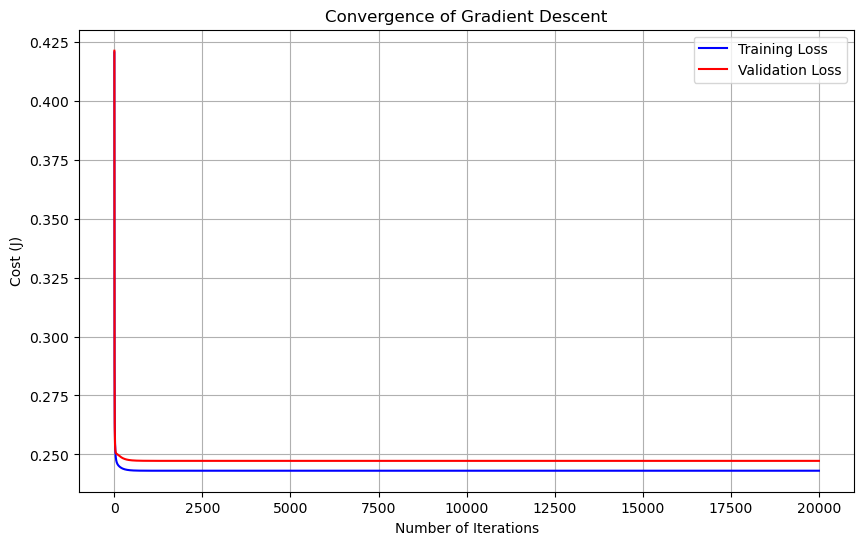

In [396]:
plt.plot(range(1, iterations + 1),cost_history, color='blue', label= 'Training Loss')
plt.plot(range(1, iterations + 1),cost_test, color='red', label= 'Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')